In [1]:
#install library kaggle untuk download dataset
!pip install kaggle

In [2]:
#buat directory .kaggle
!mkdir .kaggle
!ls -a

mkdir: cannot create directory ‘.kaggle’: File exists
.  ..  .config	dataset  .kaggle  model.png  model.tflite  sample_data


In [3]:
#buat token untuk bisa akses download dataset
import json, os
token = {"username":"donodanar35","key":"92c113ad1a2fdabc92ea0f3fe5666e90"}

with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

!chmod 600 /content/.kaggle/kaggle.json
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

os.listdir('.kaggle/')
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [4]:
#download food11-image-dataset.zip dari kaggle untuk klasifikasi keadaan tanaman tomat dengan 10 kelas
!kaggle datasets download -d andrewmvd/animal-faces -p /tmp

animal-faces.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
os.listdir('/tmp')

['__pycache__',
 'plantvillage',
 'PlantVillage',
 'validation',
 'afhq',
 'food11-image-dataset.zip',
 'animal-faces.zip',
 'plantvillage-dataset.zip',
 'evaluation',
 'training']

In [6]:
import zipfile,os
local_zip = '/tmp/animal-faces.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

#ekstra dataset file zip ke destinasi /tmp
zip_ref.extractall('/tmp')
zip_ref.close()

os.listdir('/tmp')

['__pycache__',
 'plantvillage',
 'PlantVillage',
 'validation',
 'afhq',
 'food11-image-dataset.zip',
 'animal-faces.zip',
 'plantvillage-dataset.zip',
 'evaluation',
 'training']

In [7]:
os.listdir('/tmp/afhq/train')

['dog', 'cat', 'wild']

In [8]:
base_dir = '/tmp/afhq'

#lihat base_dir dan buat folder dataset_dir
os.listdir(base_dir)
dataset_dir = os.path.join(base_dir, 'train')

In [9]:
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(dataset_dir):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)
                         
import pandas as pd
df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df.groupby(['tag']).size()

tag
cat     5153
dog     4739
wild    4738
dtype: int64

In [10]:
df.tail(5)

,path,file_name,tag
14625,/tmp/afhq/train/wild/pixabay_wild_001172.jpg,pixabay_wild_001172.jpg,wild
14626,/tmp/afhq/train/wild/pixabay_wild_001150.jpg,pixabay_wild_001150.jpg,wild
14627,/tmp/afhq/train/wild/flickr_wild_000094.jpg,flickr_wild_000094.jpg,wild
14628,/tmp/afhq/train/wild/flickr_wild_001355.jpg,flickr_wild_001355.jpg,wild
14629,/tmp/afhq/train/wild/pixabay_wild_000207.jpg,pixabay_wild_000207.jpg,wild


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14630 entries, 0 to 14629
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   path       14630 non-null  object
 1   file_name  14630 non-null  object
 2   tag        14630 non-null  object
dtypes: object(3)
memory usage: 343.0+ KB


In [12]:
from sklearn.model_selection import train_test_split
X= df['path']
y= df['tag']

#bagi dataset menjadi 2 yakni dataset validation dan dataset training
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)

In [13]:
df_tr = pd.DataFrame({'path':X_train
              ,'tag':y_train
             ,'set':'train'})

df_test = pd.DataFrame({'path':X_test
              ,'tag':y_test
             ,'set':'test'})

In [14]:
#cetak banyak data train dan data testing
print('train size', len(df_tr))
print('test size', len(df_test))

train size 11704
test size 2926


In [15]:
# melihat proporsi pada masing masing set apakah sudah ok atau masih ada yang ingin diubah
df_all = df_tr.append([df_tr,df_test]).reset_index(drop=1)\

#cetak dataframe df_all gabungan dari df_tr, df_val
print(df_all.groupby(['set','tag']).size(),'\n')

#mengecek sample data
df_all.sample(3)

set    tag 
test   cat     1059
       dog      903
       wild     964
train  cat     8188
       dog     7672
       wild    7548
dtype: int64 



,path,tag,set
20209,/tmp/afhq/train/cat/pixabay_cat_002615.jpg,cat,train
4940,/tmp/afhq/train/wild/flickr_wild_002615.jpg,wild,train
25950,/tmp/afhq/train/wild/flickr_wild_000127.jpg,wild,test


In [16]:
import shutil
from tqdm.notebook import tqdm as tq

datasource_path = "tmp/afhq/train"
dataset_path = "dataset/pelatihan"

for index, row in tq(df_tr.iterrows()):
    
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['tag'],row['image'].split('.')[0])            
    
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

In [17]:
datasource_path = "tmp/afhq/train"
dataset_path = "dataset/ujicoba"

for index, row in tq(df_test.iterrows()):
    
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['tag'],row['image'].split('.')[0])            
    
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

In [18]:
os.listdir('dataset/pelatihan/train')

['dog', 'cat', 'wild']

In [19]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#buat image data generator untuk dataset training 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

#buat image data generator untuk dataset testing
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [20]:
train_generator = train_datagen.flow_from_directory(
        'dataset/pelatihan/train/',  
        target_size=(150, 150), 
        batch_size=4,
        class_mode='categorical') #gunakan categorical untuk banyak kelas data pada dataset training

validation_generator = test_datagen.flow_from_directory(
        'dataset/ujicoba/test/', 
        target_size=(150, 150), 
        batch_size=4, 
        class_mode='categorical') #gunakan categorical untuk banyak kelas data pada dataset testing

Found 11704 images belonging to 3 classes.
Found 2926 images belonging to 3 classes.


In [21]:
#buat model sequential
model = tf.keras.models.Sequential([
    #buat masing-masing layer konvolusi, layer maxpooling                                    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #buat hidden layer dense
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    #buat inputan flatten
    tf.keras.layers.Flatten(),
    #buat output dense dengan aktivasi softmax
    tf.keras.layers.Dense(3, activation='softmax')
])

In [22]:
#compile model
model.compile(loss='categorical_crossentropy', 
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])


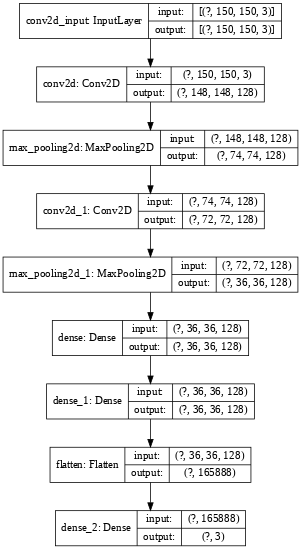

In [23]:
#buat visualisasi model
model_visual = tf.keras.utils.plot_model(model,
                          to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=55)
model_visual

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
dense (Dense)                (None, 36, 36, 128)       16512     
_________________________________________________________________
dense_1 (Dense)              (None, 36, 36, 128)       16512     
_________________________________________________________________
flatten (Flatten)            (None, 165888)            0

In [25]:
#buat kelas dan fungsi callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.92):
      if(logs.get('accuracy')>0.92):      
        print("\nAkurasi data latih dan testing telah mencapai >92%!")
        self.model.stop_training = True
callbacks = myCallback()

#lakukan training data
history = model.fit(
   train_generator,
   steps_per_epoch = 5, 
   epochs = 500,
   validation_data = validation_generator, 
   validation_steps = 5,  
   verbose = 2,
   callbacks=[callbacks])



Epoch 1/500
5/5 - 3s - loss: 2.5078 - accuracy: 0.2000 - val_loss: 1.2549 - val_accuracy: 0.2000
Epoch 2/500
5/5 - 3s - loss: 1.2672 - accuracy: 0.2500 - val_loss: 1.0940 - val_accuracy: 0.4500
Epoch 3/500
5/5 - 3s - loss: 1.1915 - accuracy: 0.4000 - val_loss: 1.0700 - val_accuracy: 0.4500
Epoch 4/500
5/5 - 3s - loss: 1.0601 - accuracy: 0.5500 - val_loss: 1.2765 - val_accuracy: 0.1000
Epoch 5/500
5/5 - 3s - loss: 1.1557 - accuracy: 0.4500 - val_loss: 1.1347 - val_accuracy: 0.3000
Epoch 6/500
5/5 - 3s - loss: 1.0944 - accuracy: 0.4000 - val_loss: 1.0927 - val_accuracy: 0.4000
Epoch 7/500
5/5 - 3s - loss: 1.1727 - accuracy: 0.3500 - val_loss: 1.1243 - val_accuracy: 0.3000
Epoch 8/500
5/5 - 3s - loss: 1.0955 - accuracy: 0.3500 - val_loss: 1.0895 - val_accuracy: 0.4500
Epoch 9/500
5/5 - 8s - loss: 1.1141 - accuracy: 0.5000 - val_loss: 1.1020 - val_accuracy: 0.2500
Epoch 10/500
5/5 - 7s - loss: 1.1112 - accuracy: 0.2500 - val_loss: 1.1054 - val_accuracy: 0.2000
Epoch 11/500
5/5 - 3s - loss:

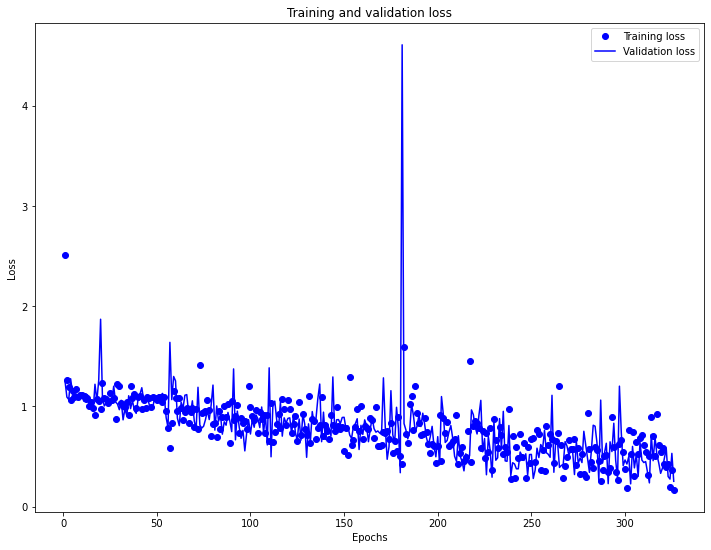

In [26]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

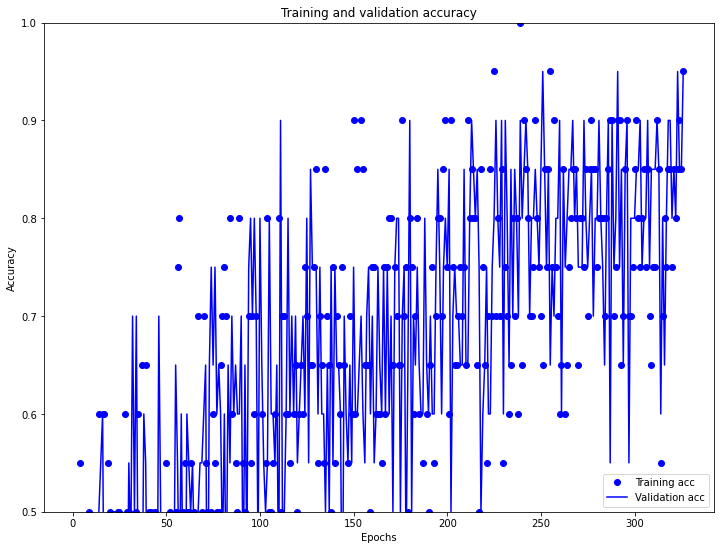

In [27]:
plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

In [29]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpdfx36zbe/assets


INFO:tensorflow:Assets written to: /tmp/tmpdfx36zbe/assets
